<a href="https://colab.research.google.com/github/gabyspina/Data_science/blob/main/Proyecto_ParteIII_Spina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Data science**


#### Análisis del Gasto en Viajes

## **Descripción del dataset**

El dataset contiene información sobre viajes realizados por personas de diferentes partes del mundo. Cada fila representa un viaje individual, incluyendo datos sobre el país y ciudad de destino, duración del viaje, gasto estimado, tipo de transporte y alojamiento, actividades realizadas, y calificaciones otorgadas al viaje y al destino.
En total, el dataset incluye 20 columnas que permiten hacer un análisis detallado del comportamiento turístico global.

### Detalle de las columnas.




*   **ID_Viajero**: Código único que identifica a cada viajero
*   **Nombre_Completo**: Nombre y apellido del viajero.
*   **Edad**: Edad del viajero al momento del viaje.
*   **Género**: Género declarado del viajero.
***País_Origen**: País desde donde inicia el viaje.
***País_Destino**: País al que se dirige el viajero.
***Ciudad_Destino**: Ciudad de destino específica del viaje.
***Continente**: Continente donde se encuentra la ciudad de destino.
***Duración_Viaje_Días** Número total de días que dura el viaje.
***Propósito_Viaje**: Motivo principal del viaje (ocio, negocios, aventura, etc.).
***Alojamiento**: Tipo de alojamiento utilizado durante el viaje (hostel, resort, etc.).
***Presupuesto_Diario_USD**: Estimación de gasto por día en dólares estadounidenses.
***Transporte** | Medio de transporte utilizado principal.
***Actividades**: Actividades realizadas durante el viaje (pueden ser varias separadas por ;).
***Calificación_Viaje**: Puntuación general del viaje del 1 al 5.
***Calificación_Destino**: Puntuación del destino específico del viaje del 1 al 5.
***Recomendaría**: Si recomendaría el viaje (Sí / No).
***Fecha_Viaje**: Fecha de inicio del viaje.
***Comentario**: Comentario libre sobre el viaje.



## Objetivo del estudio


*   El objetivo principal es identificar diferencias en el gasto total entre viajes nacionales e internacionales utilizando visualizaciones.

*   Hipótesis planteadas:

  1.   Las personas mayores de 30 años son las que más consumen durante sus viajes.
  2.   La segunda se si el consumo que realiza este grupo se realiza especialmente en Europa.
  
* Este análisis es relevante ya que se presume la gente mayor a 30 años realiza mayor cantidad de consumos que los menores de esta edad y que prefieren realizarlo en Europa.

## Importación de librerías

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans

## Carga de dataset y visualización parcial del mismo.

In [3]:
sheet_url = "https://docs.google.com/spreadsheets/d/1djWgCfqYbZfhEaQNlBVjg79kFDhaECBHEUyGz3ctMxw/export?format=csv"
df = pd.read_csv(sheet_url)
df.head()


,ID_Viajero,Nombre_Completo,Edad,Género,País_Origen,País_Destino,Ciudad_Destino,Continente,Duración_Viaje_Días,Propósito_Viaje,Alojamiento,Presupuesto_Diario_USD,Transporte,Actividades,Calificación_Viaje,Calificación_Destino,Recomendaría,Fecha_Viaje,Comentario
0,TRV00001,Albano Llopis Hierro,25,Masculino,Estonia,Marruecos,Marrakech,Asia,26,Aventura,Hostel,90.27,Bicicleta,Safari,1,5,No,2021-02-24,Assumenda in adipisci dolor magnam ad dicta of...
1,TRV00002,Eligia Agudo-Cuervo,19,Masculino,Trinidad y Tabago,España,Barcelona,América del Sur,9,Negocios,Resort,192.55,Barco,Safari; Tour gastronómico,2,4,No,2023-03-05,Culpa vero excepturi at atque sed nobis.
2,TRV00003,Pánfilo Segovia Casanovas,66,Masculino,Kuwait,Argentina,Buenos Aires,Europa,25,Cultural,Airbnb,105.03,Tren,Museo; Concierto; Tour gastronómico,1,3,No,2024-12-22,Repudiandae nulla similique neque provident al...
3,TRV00004,Aníbal Teófilo Guerrero Cabrero,34,Masculino,Lesotho,Sudáfrica,Ciudad del Cabo,América del Norte,26,Cultural,Resort,63.70,Colectivo,Safari,3,5,No,2024-02-19,Cum explicabo pariatur praesentium placeat arc...
4,TRV00005,Ceferino del Pino,30,No binario,Granada,Australia,Sídney,Oceanía,5,Ocio,Hostel,238.73,Avión,Museo; Tour gastronómico,3,4,No,2025-01-06,Placeat sapiente quod dolorem adipisci et eaque.


## Descripción del Dataset

In [4]:
df.describe()

,Edad,Duración_Viaje_Días,Presupuesto_Diario_USD,Calificación_Viaje,Calificación_Destino
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,44.228000,16.521500,162.003085,2.971000,3.006500
std,15.179434,8.052326,77.983347,1.405399,1.406573
min,18.000000,3.000000,30.060000,1.000000,1.000000
25%,31.000000,10.000000,93.392500,2.000000,2.000000
50%,45.000000,16.000000,161.690000,3.000000,3.000000
75%,57.000000,24.000000,229.815000,4.000000,4.000000
max,70.000000,30.000000,299.700000,5.000000,5.000000


In [5]:
print(df.shape)

(2000, 19)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Viajero              2000 non-null   object 
 1   Nombre_Completo         2000 non-null   object 
 2   Edad                    2000 non-null   int64  
 3   Género                  2000 non-null   object 
 4   País_Origen             2000 non-null   object 
 5   País_Destino            2000 non-null   object 
 6   Ciudad_Destino          2000 non-null   object 
 7   Continente              2000 non-null   object 
 8   Duración_Viaje_Días     2000 non-null   int64  
 9   Propósito_Viaje         2000 non-null   object 
 10  Alojamiento             2000 non-null   object 
 11  Presupuesto_Diario_USD  2000 non-null   float64
 12  Transporte              2000 non-null   object 
 13  Actividades             2000 non-null   object 
 14  Calificación_Viaje      2000 non-null   

In [7]:
print(df.isnull().sum())

ID_Viajero                0
Nombre_Completo           0
Edad                      0
Género                    0
País_Origen               0
País_Destino              0
Ciudad_Destino            0
Continente                0
Duración_Viaje_Días       0
Propósito_Viaje           0
Alojamiento               0
Presupuesto_Diario_USD    0
Transporte                0
Actividades               0
Calificación_Viaje        0
Calificación_Destino      0
Recomendaría              0
Fecha_Viaje               0
Comentario                0
dtype: int64


In [8]:
df.dtypes[["Edad", "Duración_Viaje_Días", "Presupuesto_Diario_USD", "Calificación_Viaje", "Calificación_Destino"]].head()


,0
Edad,int64
Duración_Viaje_Días,int64
Presupuesto_Diario_USD,float64
Calificación_Viaje,int64
Calificación_Destino,int64


## Creación de variables
### Se crean variables "Gasto Total", "Alto Consumo" y "Mayor_30" para poder ayudar a determinar el consumo realizado y el rango etareo a evaluar.

In [9]:
df["Gasto_Total"] = df["Presupuesto_Diario_USD"] * df["Duración_Viaje_Días"]
df["Mayor_30"] = df["Edad"].apply(lambda x: "Mayor a 30" if x > 30 else "30 o menos")
df["Alto_Consumo"] = df["Gasto_Total"].apply(lambda x: 1 if x > 3000 else 0)


## Analisis exploratorio.
### Se verifica la relación entre Duración del viaje y Gasto total.

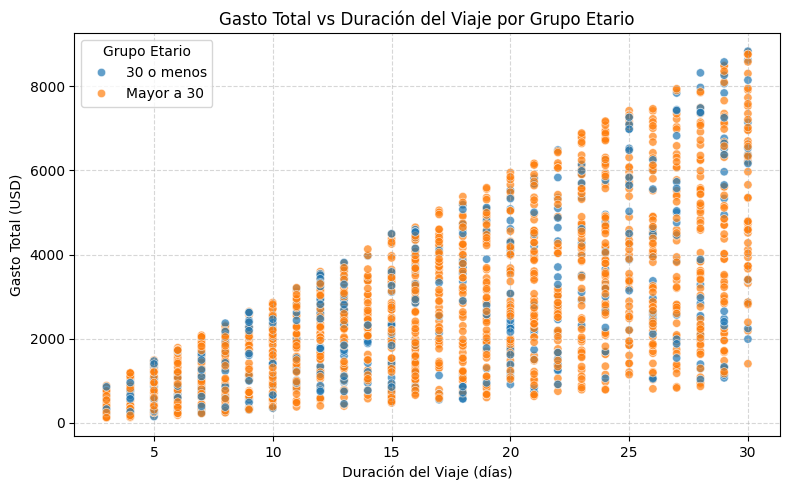

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Duración_Viaje_Días", y="Gasto_Total", hue="Mayor_30", alpha=0.7)
plt.title("Gasto Total vs Duración del Viaje por Grupo Etario")
plt.xlabel("Duración del Viaje (días)")
plt.ylabel("Gasto Total (USD)")
plt.legend(title="Grupo Etario")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

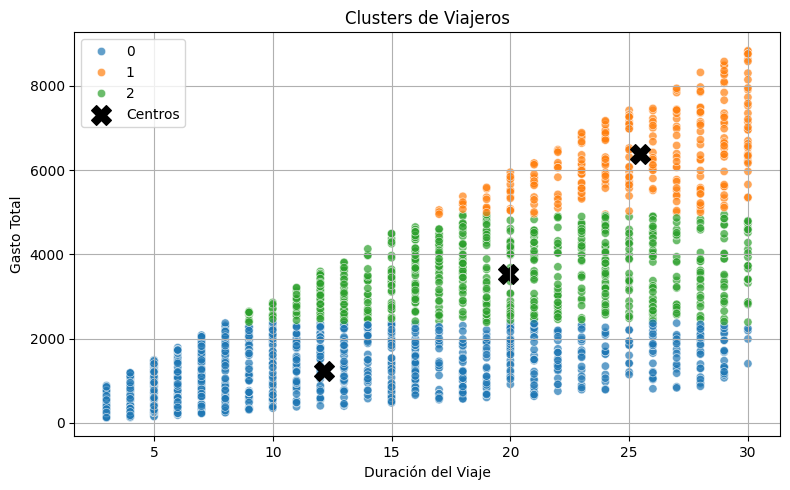

Centros de los clusters:
Cluster 0: Duración promedio = 12.18, Gasto promedio = 1228.04
Cluster 1: Duración promedio = 25.47, Gasto promedio = 6375.12
Cluster 2: Duración promedio = 19.92, Gasto promedio = 3532.13


In [29]:
X_cluster = df[["Duración_Viaje_Días", "Gasto_Total"]]
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Duración_Viaje_Días", y="Gasto_Total", hue="Cluster", palette="tab10", alpha=0.7)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centros')
plt.title("Clusters de Viajeros")
plt.xlabel("Duración del Viaje")
plt.ylabel("Gasto Total")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print("Centros de los clusters:")
for i, c in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: Duración promedio = {c[0]:.2f}, Gasto promedio = {c[1]:.2f}")


## Implementacion del modelo de predicción.

In [11]:
features = ["Edad", "Duración_Viaje_Días", "Presupuesto_Diario_USD"]
X = df[features]
y = df["Alto_Consumo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


## Valoración de las features

<ipython-input-20-33573e56578e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importancia", y="Feature", palette="viridis")


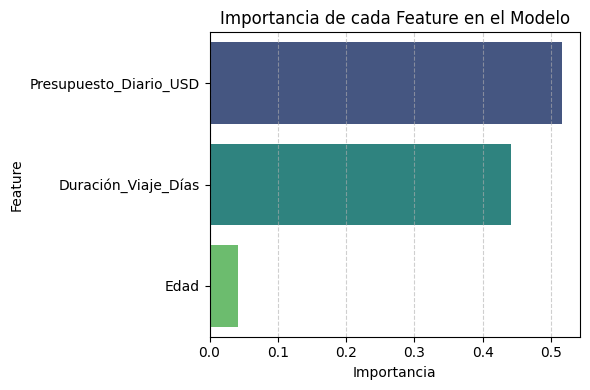

In [20]:
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=importance_df, x="Importancia", y="Feature", palette="viridis")
plt.title("Importancia de cada Feature en el Modelo")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## Evaluación del modelo

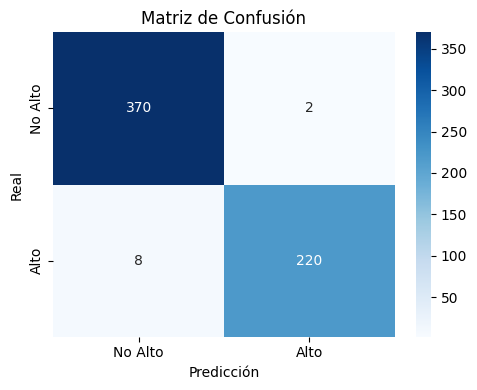

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Alto", "Alto"], yticklabels=["No Alto", "Alto"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()


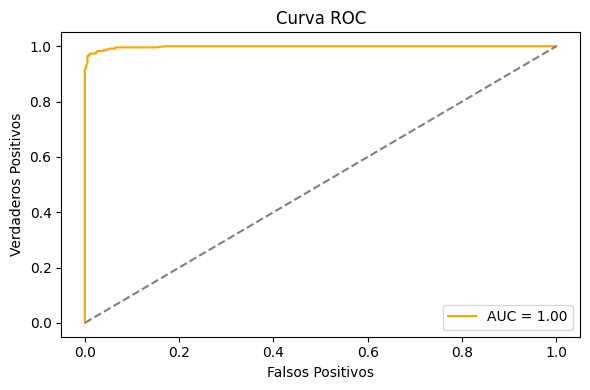

In [22]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="orange")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.9833333333333333

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       372
           1       0.99      0.96      0.98       228

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



## Comparativos por edad.

<ipython-input-30-79f4bc8c917f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gasto_por_grupo, x="Mayor_30", y="Gasto_Total", palette="Set2")


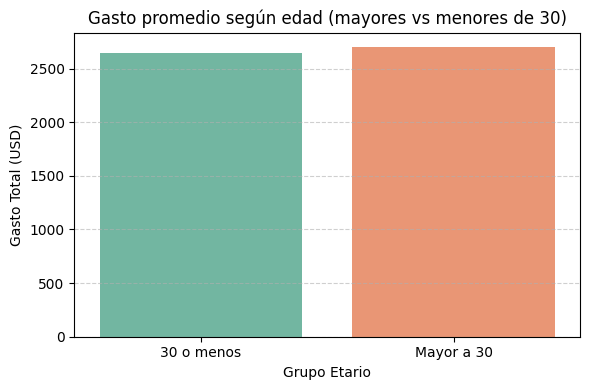

In [30]:
gasto_por_grupo = df.groupby("Mayor_30")["Gasto_Total"].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=gasto_por_grupo, x="Mayor_30", y="Gasto_Total", palette="Set2")
plt.title("Gasto promedio según edad (mayores vs menores de 30)")
plt.ylabel("Gasto Total (USD)")
plt.xlabel("Grupo Etario")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-31-8ae92320eafd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gasto_europa, x="Mayor_30", y="Gasto_Total", palette="coolwarm")


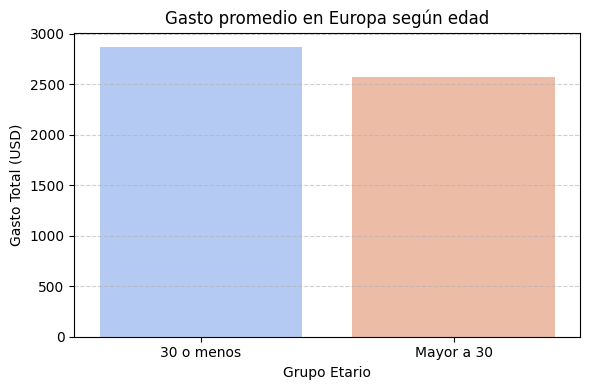

In [31]:
df_europa = df[df["Continente"] == "Europa"]
gasto_europa = df_europa.groupby("Mayor_30")["Gasto_Total"].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=gasto_europa, x="Mayor_30", y="Gasto_Total", palette="coolwarm")
plt.title("Gasto promedio en Europa según edad")
plt.ylabel("Gasto Total (USD)")
plt.xlabel("Grupo Etario")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Conclusiones


- El modelo de clasificación tiene alta precisión (accuracy > 98%) y destaca el Presupuesto Diario como variable más influyente.
- El clustering permitió segmentar a los viajeros en tres perfiles distintos según duración y gasto.
- Las personas mayores de 30 años tienden a gastar más, confirmando parte de la hipótesis.
- En Europa, curiosamente, los menores de 30 gastan más, lo que sugiere que el destino influye en el comportamiento.
